# Project Title: NTIRE 2023 Image Denoising Challenge (noise level=50)

The task of restoring the clean contents from a noisy input image based on a set of prior examples of noisy and noise-free images.

# Team Members

1. D M Shalini Jayasir
2. M Krishnaraj
3. Bhimavarapu Saanjith Reeddy

# Expected Outcome 



Solution capable to produce high quality results with the best performance measured by PSNR for for image denoising with noise level 50.

# Details of the dataset to be used

We are using DIV2K and LSDIR images with a large diversity of contents.

1.DIV2K
DIV2K dataset has the following structure:
1000 2K resolution images divided into: 800 images for training, 100 images for validation, 100 images for testing

2.LSDIR
LSDIR dataset has the following structure:
86,991 high resolution images divided into: 84,991 images for training, 1,000 images for validation, 1,000 images for testing



# Work done so far

Approach: Wavelet denoising

Wavelet denoising relies on the wavelet representation of the image. Gaussian noise tends to be represented by small values in the wavelet domain and can be removed by setting coefficients below a given threshold to zero (hard thresholding) or shrinking all coefficients toward zero by a given amount (soft thresholding).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage.util import random_noise
from PIL import Image

In [2]:
image = np.array(Image.open(r"C:\Users\shali\Downloads\DIV2K_train_HR\DIV2K_train_HR\0077.png"))

In [3]:
#Adding guassian noise of level=50
noise = np.random.normal(0,50, image.shape)
noisy_image = image + noise
noisy_image = np.clip(noisy_image, 0, 255)
noisy = np.uint8(noisy_image)

In [4]:
# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, channel_axis=-1, average_sigmas=True)
sigma_est

47.29270553313622

BayesShrink

The BayesShrink algorithm is an adaptive approach to wavelet soft thresholding where a unique threshold is estimated for each wavelet subband. This generally results in an improvement over what can be obtained with a single threshold.

In [5]:

bayeshrink = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)


VisuShrink

The VisuShrink approach employs a single, universal threshold to all wavelet detail coefficients. This threshold is designed to remove additive Gaussian noise with high probability, which tends to result in overly smooth image appearance. By specifying a sigma that is smaller than the true noise standard deviation, a more visually agreeable result can be obtained.

In [6]:
# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.
visushrink = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est, rescale_sigma=True)

In [7]:
#Repeat, specifying a reduction in the threshold by factors of 4.
visushrink4 = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4, rescale_sigma=True)

In [8]:
#Repeat, specifying a reduction in the threshold by factors of 6.
visushrink6 = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/6, rescale_sigma=True)

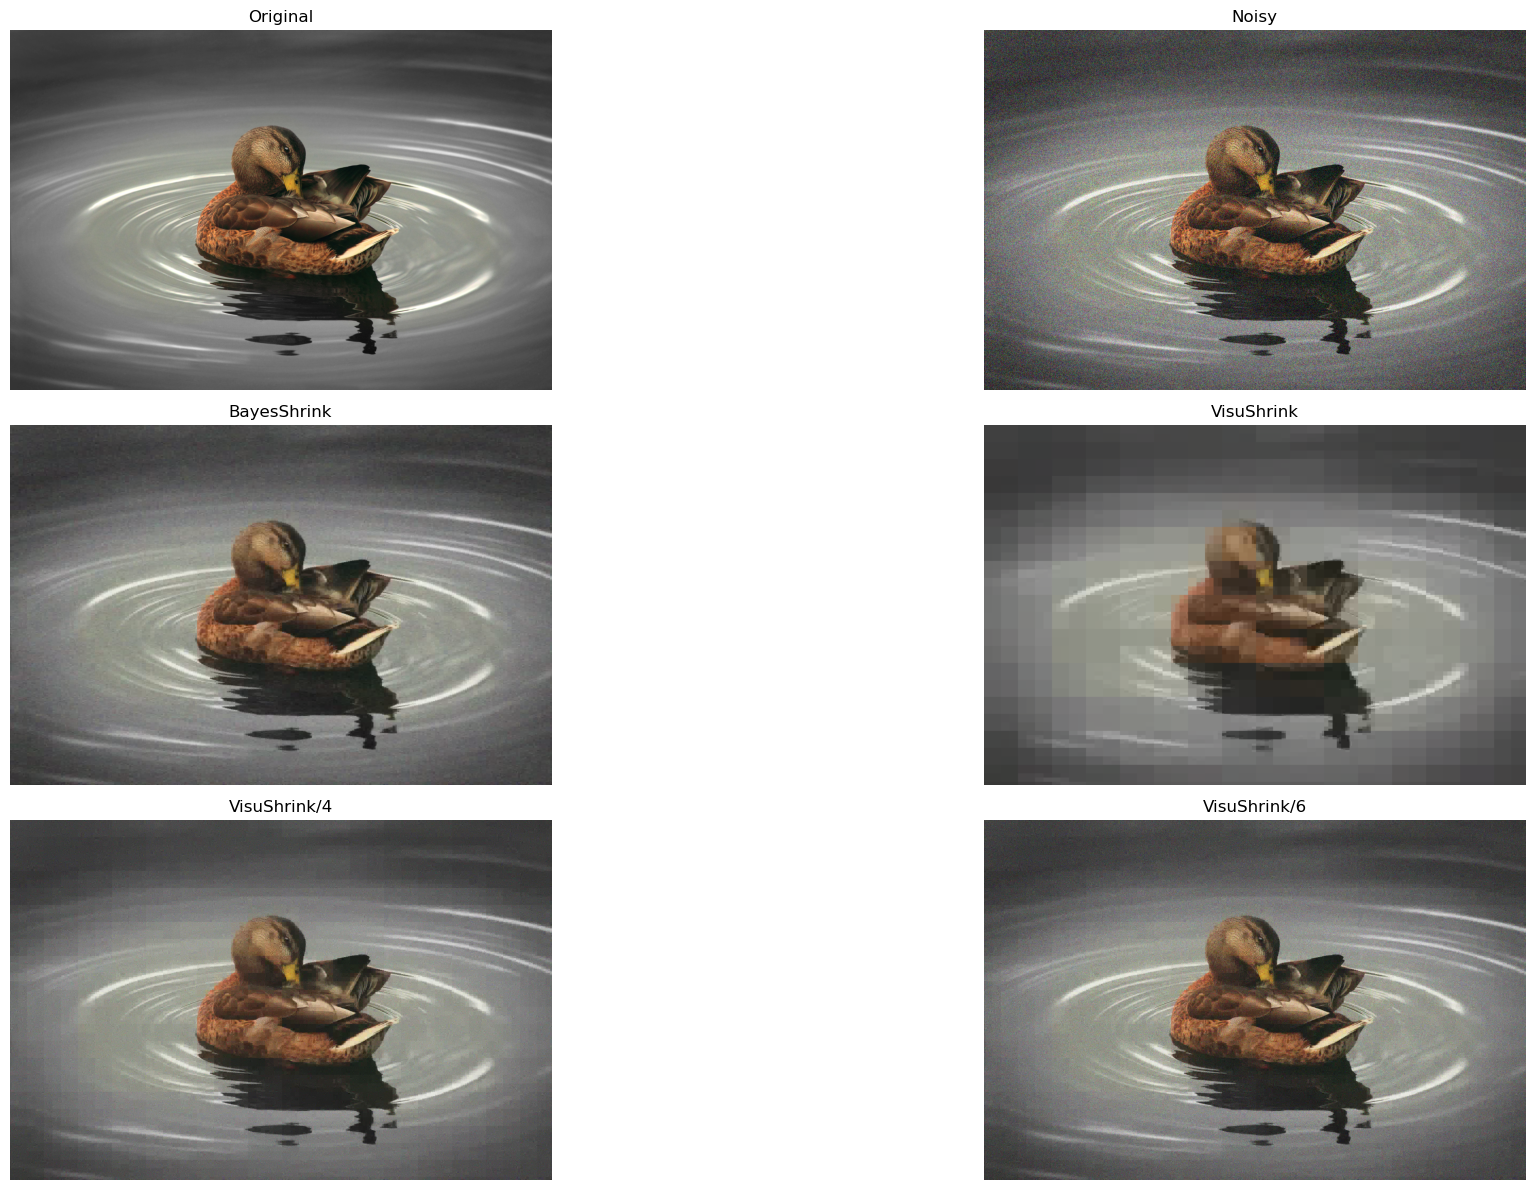

In [9]:
# Plot and display the images
fig, axes = plt.subplots(3,2, figsize=(24, 12))
titles = ['Original', 'Noisy', 'BayesShrink', 'VisuShrink', 'VisuShrink/4', 'VisuShrink/6']
images = [image, noisy, bayeshrink, visushrink, visushrink4, visushrink6]

for ax, title, img in zip(axes.flatten(), titles, images):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

By visual analysis, we can see that BaysShrink and VisuShrink6(Visushrink with threshold reduced by a factor of 6) gives better results.

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
#Calsulating PSNR
from skimage.metrics import peak_signal_noise_ratio
psnr_noise = peak_signal_noise_ratio(image, noisy)
psnr_bayes = peak_signal_noise_ratio(image, bayeshrink)
psnr_visushrink = peak_signal_noise_ratio(image, visushrink)
psnr_visushrink4 = peak_signal_noise_ratio(image, visushrink4)
psnr_visushrink6 = peak_signal_noise_ratio(image, visushrink6)

In [12]:
# Print the similarity scores
print("Similarity Scores:")
print("Noisy PSNR:", psnr_noise)
print("BayesShrink PSNR:", psnr_bayes)
print("VisuShrink PSNR:", psnr_visushrink)
print("VisuShrink/4 PSNR:", psnr_visushrink4)
print("VisuShrink/6 PSNR:", psnr_visushrink6)

Similarity Scores:
Noisy PSNR: 14.61608579169609
BayesShrink PSNR: 7.031262442164653
VisuShrink PSNR: 7.030882786363383
VisuShrink/4 PSNR: 7.031199065413252
VisuShrink/6 PSNR: 7.031256039486269


From the PSNR values, we can derive the same conclusion that BaysShrink and VisuShrink6(Visushrink with threshold reduced by a factor of 6) gives better results.

# Future Plan

Denoising images using deep learning (Noise2Void)

Noise2Void learns directly from noisy images without the need for clean images, making it the ideal choice for denoising confocal images.​

Only requires noisy images, no need for additional noisy or clean images. ​

Assumption:
Signal has a structure and noise does not. ​
Therefore, it is possible to predict signal by looking at the surrounding pixels but impossible to predict noise.